<a href="https://colab.research.google.com/github/Eduard953/Image_Processing_SS20/blob/master/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# display the plots inside the notebook
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random
from io import BytesIO
from PIL import Image
from skimage.color import rgb2gray

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

In [0]:
# Load the pictures here
sample_images = []
direc = 'misc/' # directory of the sample pictures relative to your notebook
for number in [1,3,5,6]:
    sample_images.append(
        np.array(Image.open(direc+'4.2.0'+str(number)+'.tiff'))
    )
for name in ['house']:
    sample_images.append(
        np.array(Image.open(direc+name+'.tiff'))
    )

<BarContainer object of 5 artists>

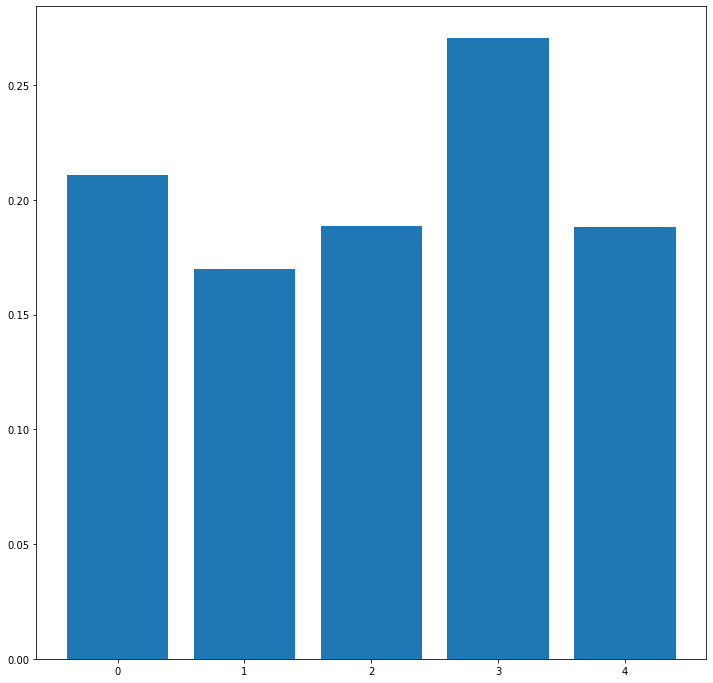

In [4]:
def qualify_noise(img):
    """Qualify the noise based on the std of a gaussian model.
       You may find a window that is contant in the images.
    """

    # convert to greyscale
    
    img = rgb2gray(img)

    # mue = np.average(img)
    # sigma = np.sqrt(np.average((img - np.average(img))**2))

    return np.sqrt(np.average((img - np.average(img))**2))

plt.bar(range(len(sample_images)), [qualify_noise(i) for i in sample_images])

<BarContainer object of 5 artists>

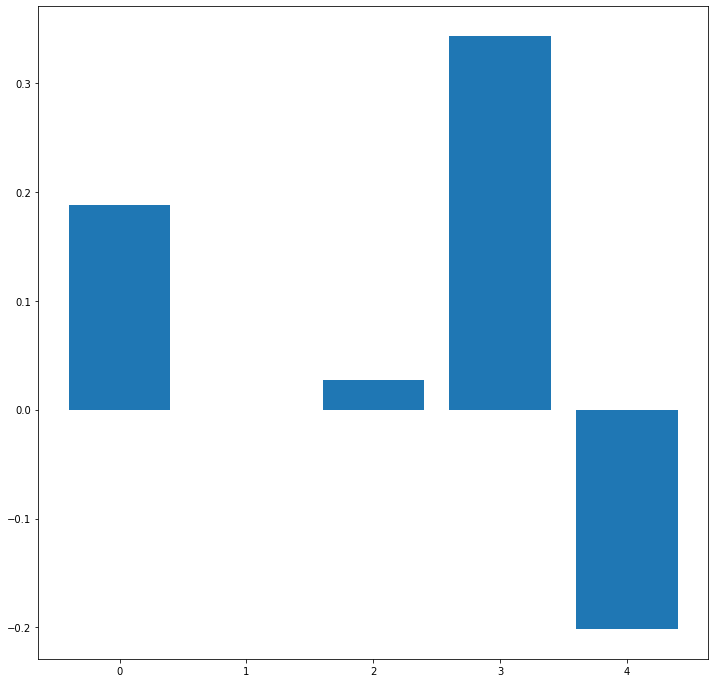

In [5]:
def qualify_sharpness(img):
    """Qualify the sharpness based on the average pixel differences."""

    # convert to grayscale

    img = rgb2gray(img)

    # calculate difference bewteen adjecent pixels of same image

    return np.average(img[1:]-img[:1])
plt.bar(range(len(sample_images)), [qualify_sharpness(i) for i in sample_images])

In [0]:
def jpeg_enocde(img, quality):
    pil_img = Image.fromarray(img)
    buffer = BytesIO()
    pil_img.save(buffer, "JPEG", quality=quality)
    return buffer

def jpeg_decode(buffer):
    img = Image.open(buffer)
    return np.array(img)

def jpeg_quality_filter(img, quality):
    as_jpeg = jpeg_enocde(img, quality)
    return jpeg_decode(as_jpeg)

In [7]:

images_for_jpeg = sample_images[2::]
len(images_for_jpeg)

3

In [0]:
images10 = [jpeg_quality_filter(img, 10) for img in images_for_jpeg]
images50 = [jpeg_quality_filter(img, 50) for img in images_for_jpeg]
images80 = [jpeg_quality_filter(img, 80) for img in images_for_jpeg]

0
0.9999801588209145
0.9999952067995337
0.9999977183744958


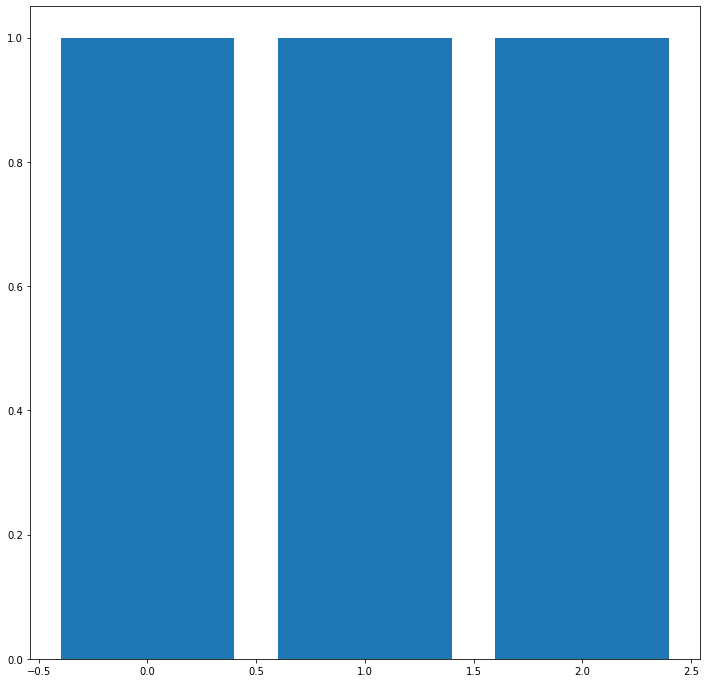

1
0.9999685187655502
0.9999887367278618
0.9999933587600518


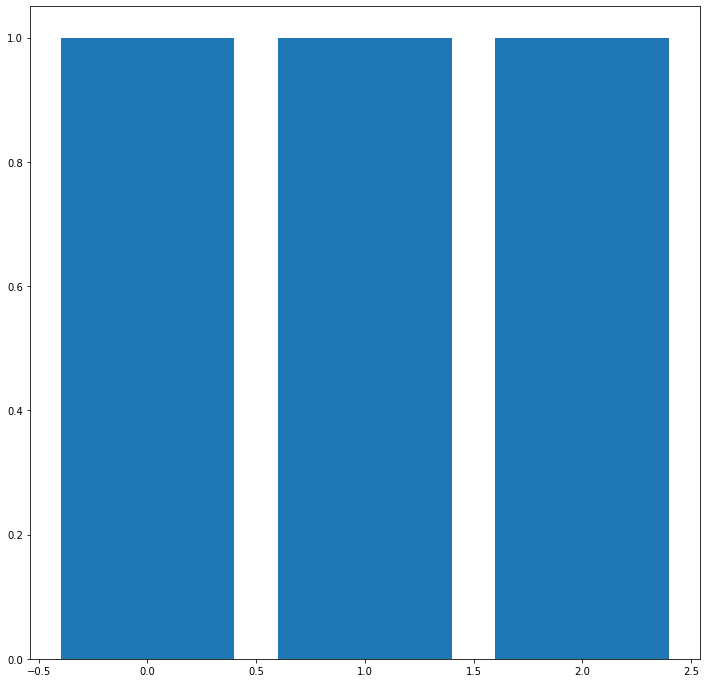

2
0.9999715397235543
0.9999924955283847
0.9999966746075919


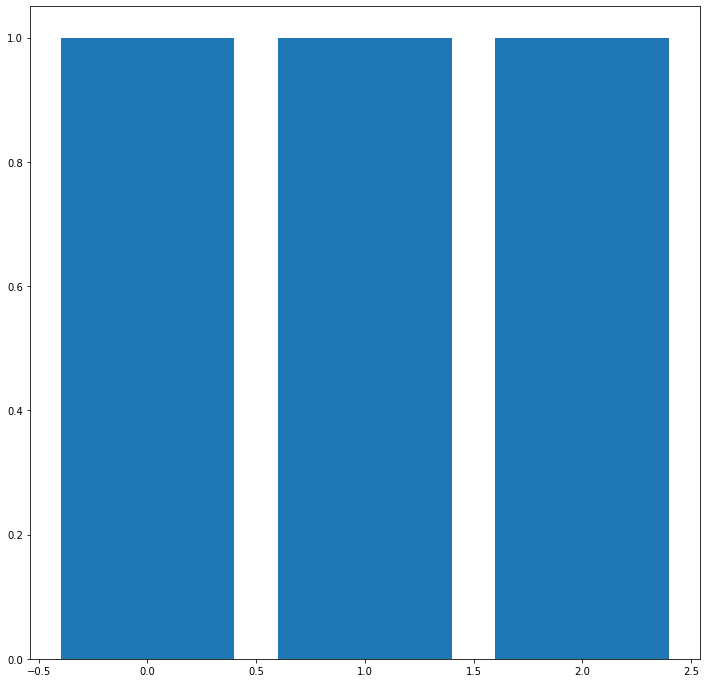

In [9]:
def ssim(img, filtered_img):
    """The SSIM similarity measure. Use the parameters from the paper
    as on the second to last slide from the lecture"""

    # convert to greyscale

    img = rgb2gray(img)
    filtered_img = rgb2gray(filtered_img)

    # https://en.wikipedia.org/wiki/Structural_similarity#Algorithm

    # calculate c1 & c2 with (k1 = 0.01 * L )**2, (k2 = 0.03 * L )**2

    c1 = (0.01*255) ** 2
    c2 = (0.03*255) ** 2
    
    # a = 2 * mue(x) * mue(y) + c1

    a = 2 * np.average(img) * np.average(filtered_img) + c1

    # b = 2 * sigma(x,y)  + c2

    b = 2 * np.average((img-np.average(img)) * (filtered_img-(np.average(filtered_img)))) + c2

    # c = (mue(x)**2) * (mue(x)**2) + c1

    c = np.average(img) ** 2 + np.average(filtered_img) ** 2 + c1

    # d = sigma(x) **2 + sigma(y)** 2 + c2

    d = qualify_noise(img) ** 2 + qualify_noise(filtered_img) ** 2 + c2
    x = ((a * b)/(c * d))
    print(x)
    return (x)

for i, img in enumerate(images_for_jpeg):
    print(i)
    compressed_images = [images10[i], images50[i], images80[i]]
    plt.bar(range(len(compressed_images)),
            [ssim(img, comp) for comp in compressed_images])
    plt.show()